In [1]:
import scipy.linalg as la
from math_functions.Get_state_index import Get_State_index
from main_grape.Grape import Grape
%pylab inline
import random as rd
import time
from IPython import display


Populating the interactive namespace from numpy and matplotlib


In [2]:
#Defining time scales
total_time = 5.0
steps = 400

#Defining H0
qubit_state_num = 4
alpha = 0.224574
freq_ge = 3.9225#GHz
ens = np.array([ 2*np.pi*ii*(freq_ge - 0.5*(ii-1)*alpha) for ii in np.arange(qubit_state_num)])
Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_z   = np.diag(np.arange(0,qubit_state_num))
I_q = np.identity(qubit_state_num)
H_q = np.diag(ens)
H0 = H_q 
       

#Defining Forbidden sates

states_forbidden_list = [3]

#Defining Concerned states (starting states)
psi0 = [0,1]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1,2]
states_draw_names = ['g','e','f']

#Defining U (Target)

Ut_c = la.expm((0-1j)*total_time*H0)
Ct_c = Ut_c.copy()
Ct_c[1,0] = 1
Ct_c[0,1] = 1
Ct_c[0,0] = 0
Ct_c[1,1] = 0
U = Ct_c

#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num)
U0= q_identity

#Defining control Hs
XI = Q_x
ZI = Q_z
Hops = [XI,ZI]
ops_max_amp = [2.0,2.0]
Hnames =['x','z']

#Defining convergence parameters
max_iterations = 50
decay = max_iterations/2
convergence = {'rate':0.01, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-6,'learning_rate_decay':decay}
reg_coeffs = {'alpha' : 0, 'z':0, 'dwdt':0,'d2wdt2':0, 'inter':0}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}

    #Defining initial pulses
u0 = []
u0.append(np.ones(steps))
#u0.append(np.zeros(steps))

H_time_scales = {'0':0.1}

0.0120032


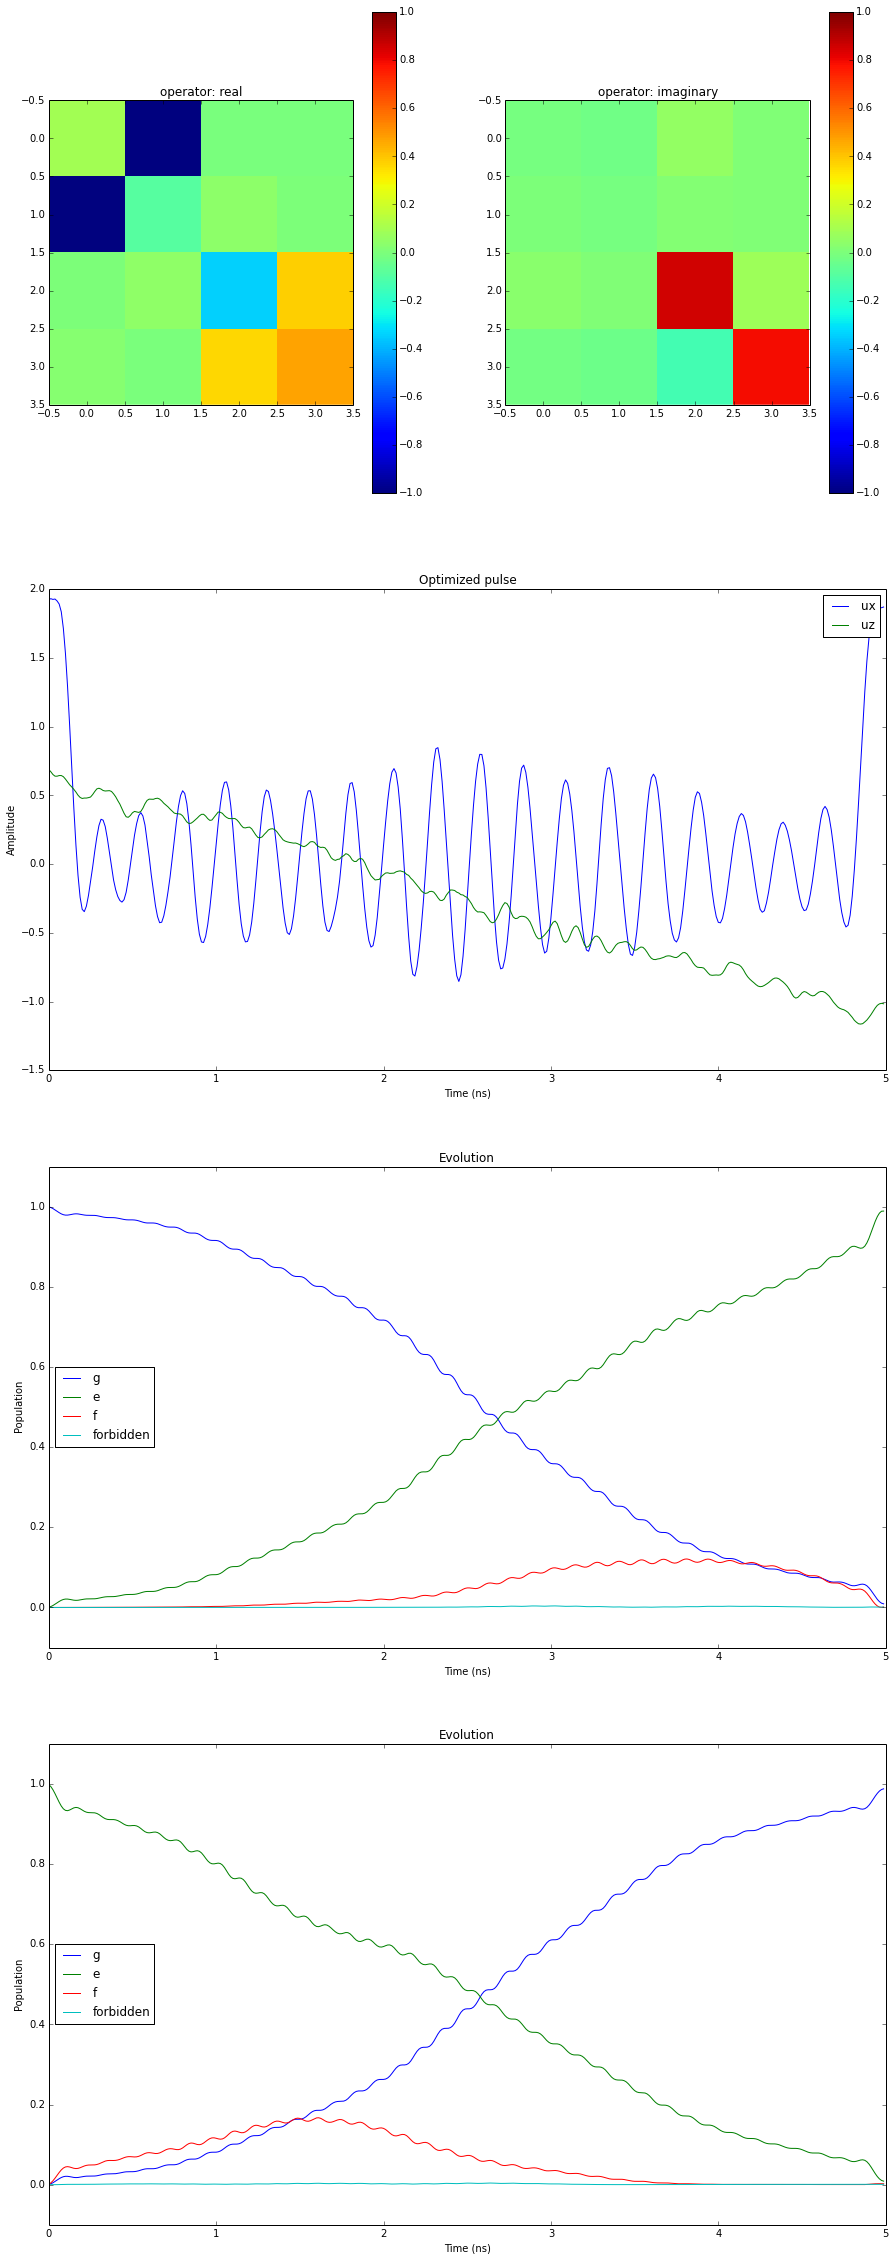

In [5]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True
uks,U_final = Grape(H0,Hops,Hnames,U,U0,total_time,steps,psi0,convergence, draw = [states_draw_list,states_draw_names],show_plots = False, 
      forbidden = states_forbidden_list, Unitary_error = 1e-6, method = 'L-BFGS-B',switch = True,  maxA=ops_max_amp)
      
      

In [6]:
print np.shape(uks)
print uks[0]


(2, 400)
[  1.92421484e+00   1.93153298e+00   1.92629981e+00   1.92903674e+00
   1.91507304e+00   1.89246190e+00   1.83637500e+00   1.71494508e+00
   1.53277528e+00   1.29285157e+00   1.00995183e+00   7.06089556e-01
   4.08638209e-01   1.39889777e-01  -8.16962197e-02  -2.40336627e-01
  -3.28704178e-01  -3.45533073e-01  -3.05660129e-01  -2.27555975e-01
  -1.25636443e-01  -2.09339000e-02   9.40463766e-02   1.97959661e-01
   2.80881345e-01   3.26679766e-01   3.20062846e-01   2.74236739e-01
   1.89277008e-01   8.69116709e-02  -2.08044294e-02  -1.15803272e-01
  -1.85900658e-01  -2.34760091e-01  -2.64132529e-01  -2.76084304e-01
  -2.58256227e-01  -2.04815447e-01  -1.15996994e-01  -6.76339306e-03
   1.05490610e-01   2.10656971e-01   2.93953300e-01   3.52667093e-01
   3.75143409e-01   3.50749522e-01   2.85061449e-01   1.72630057e-01
   5.53639308e-02  -7.73404092e-02  -1.91525146e-01  -3.00897986e-01
  -3.81367534e-01  -4.25936162e-01  -4.22416776e-01  -3.76282364e-01
  -2.99554676e-01  -2.015